In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()


'/Users/gardar/Documents/UCL/ELEC0054 IMLS Research Project/04 Implementation/03 Hydraulic Simulations'

In [32]:
inv_pipe_length = pd.read_csv('./studies/logs/l-town-chebnet-geneva_gpu-2.csv')
unweighted      = pd.read_csv('./studies/logs/l-town-chebnet-unweighted-1.csv')
hydraulic_loss  = pd.read_csv('./studies/logs/l-town-chebnet-hydraulic_loss-1.csv')

In [33]:
hydraulic_loss

,Unnamed: 0,trn_loss,val_loss,val_rel_err,val_rel_err_o,val_rel_err_h
0,0,0.017065,0.006363,0.067326,0.060627,0.067621
1,1,0.004610,0.003126,0.046963,0.045237,0.047039
2,2,0.002476,0.001932,0.034327,0.030638,0.034489
3,3,0.001712,0.001420,0.028516,0.022784,0.028768
4,4,0.001330,0.001142,0.025074,0.020206,0.025289
...,...,...,...,...,...,...
69,69,0.000130,0.000127,0.010687,0.010391,0.010700
70,70,0.000129,0.000122,0.010444,0.010114,0.010459
71,71,0.000128,0.000118,0.010258,0.009901,0.010274
72,72,0.000128,0.000114,0.010033,0.009647,0.010050


In [34]:
inv_pipe_length = inv_pipe_length[["trn_loss","val_loss","val_rel_err","val_rel_err_o","val_rel_err_h"]]
unweighted      =      unweighted[["trn_loss","val_loss","val_rel_err","val_rel_err_o","val_rel_err_h"]]
hydraulic_loss      =      hydraulic_loss[["trn_loss","val_loss","val_rel_err","val_rel_err_o","val_rel_err_h"]]

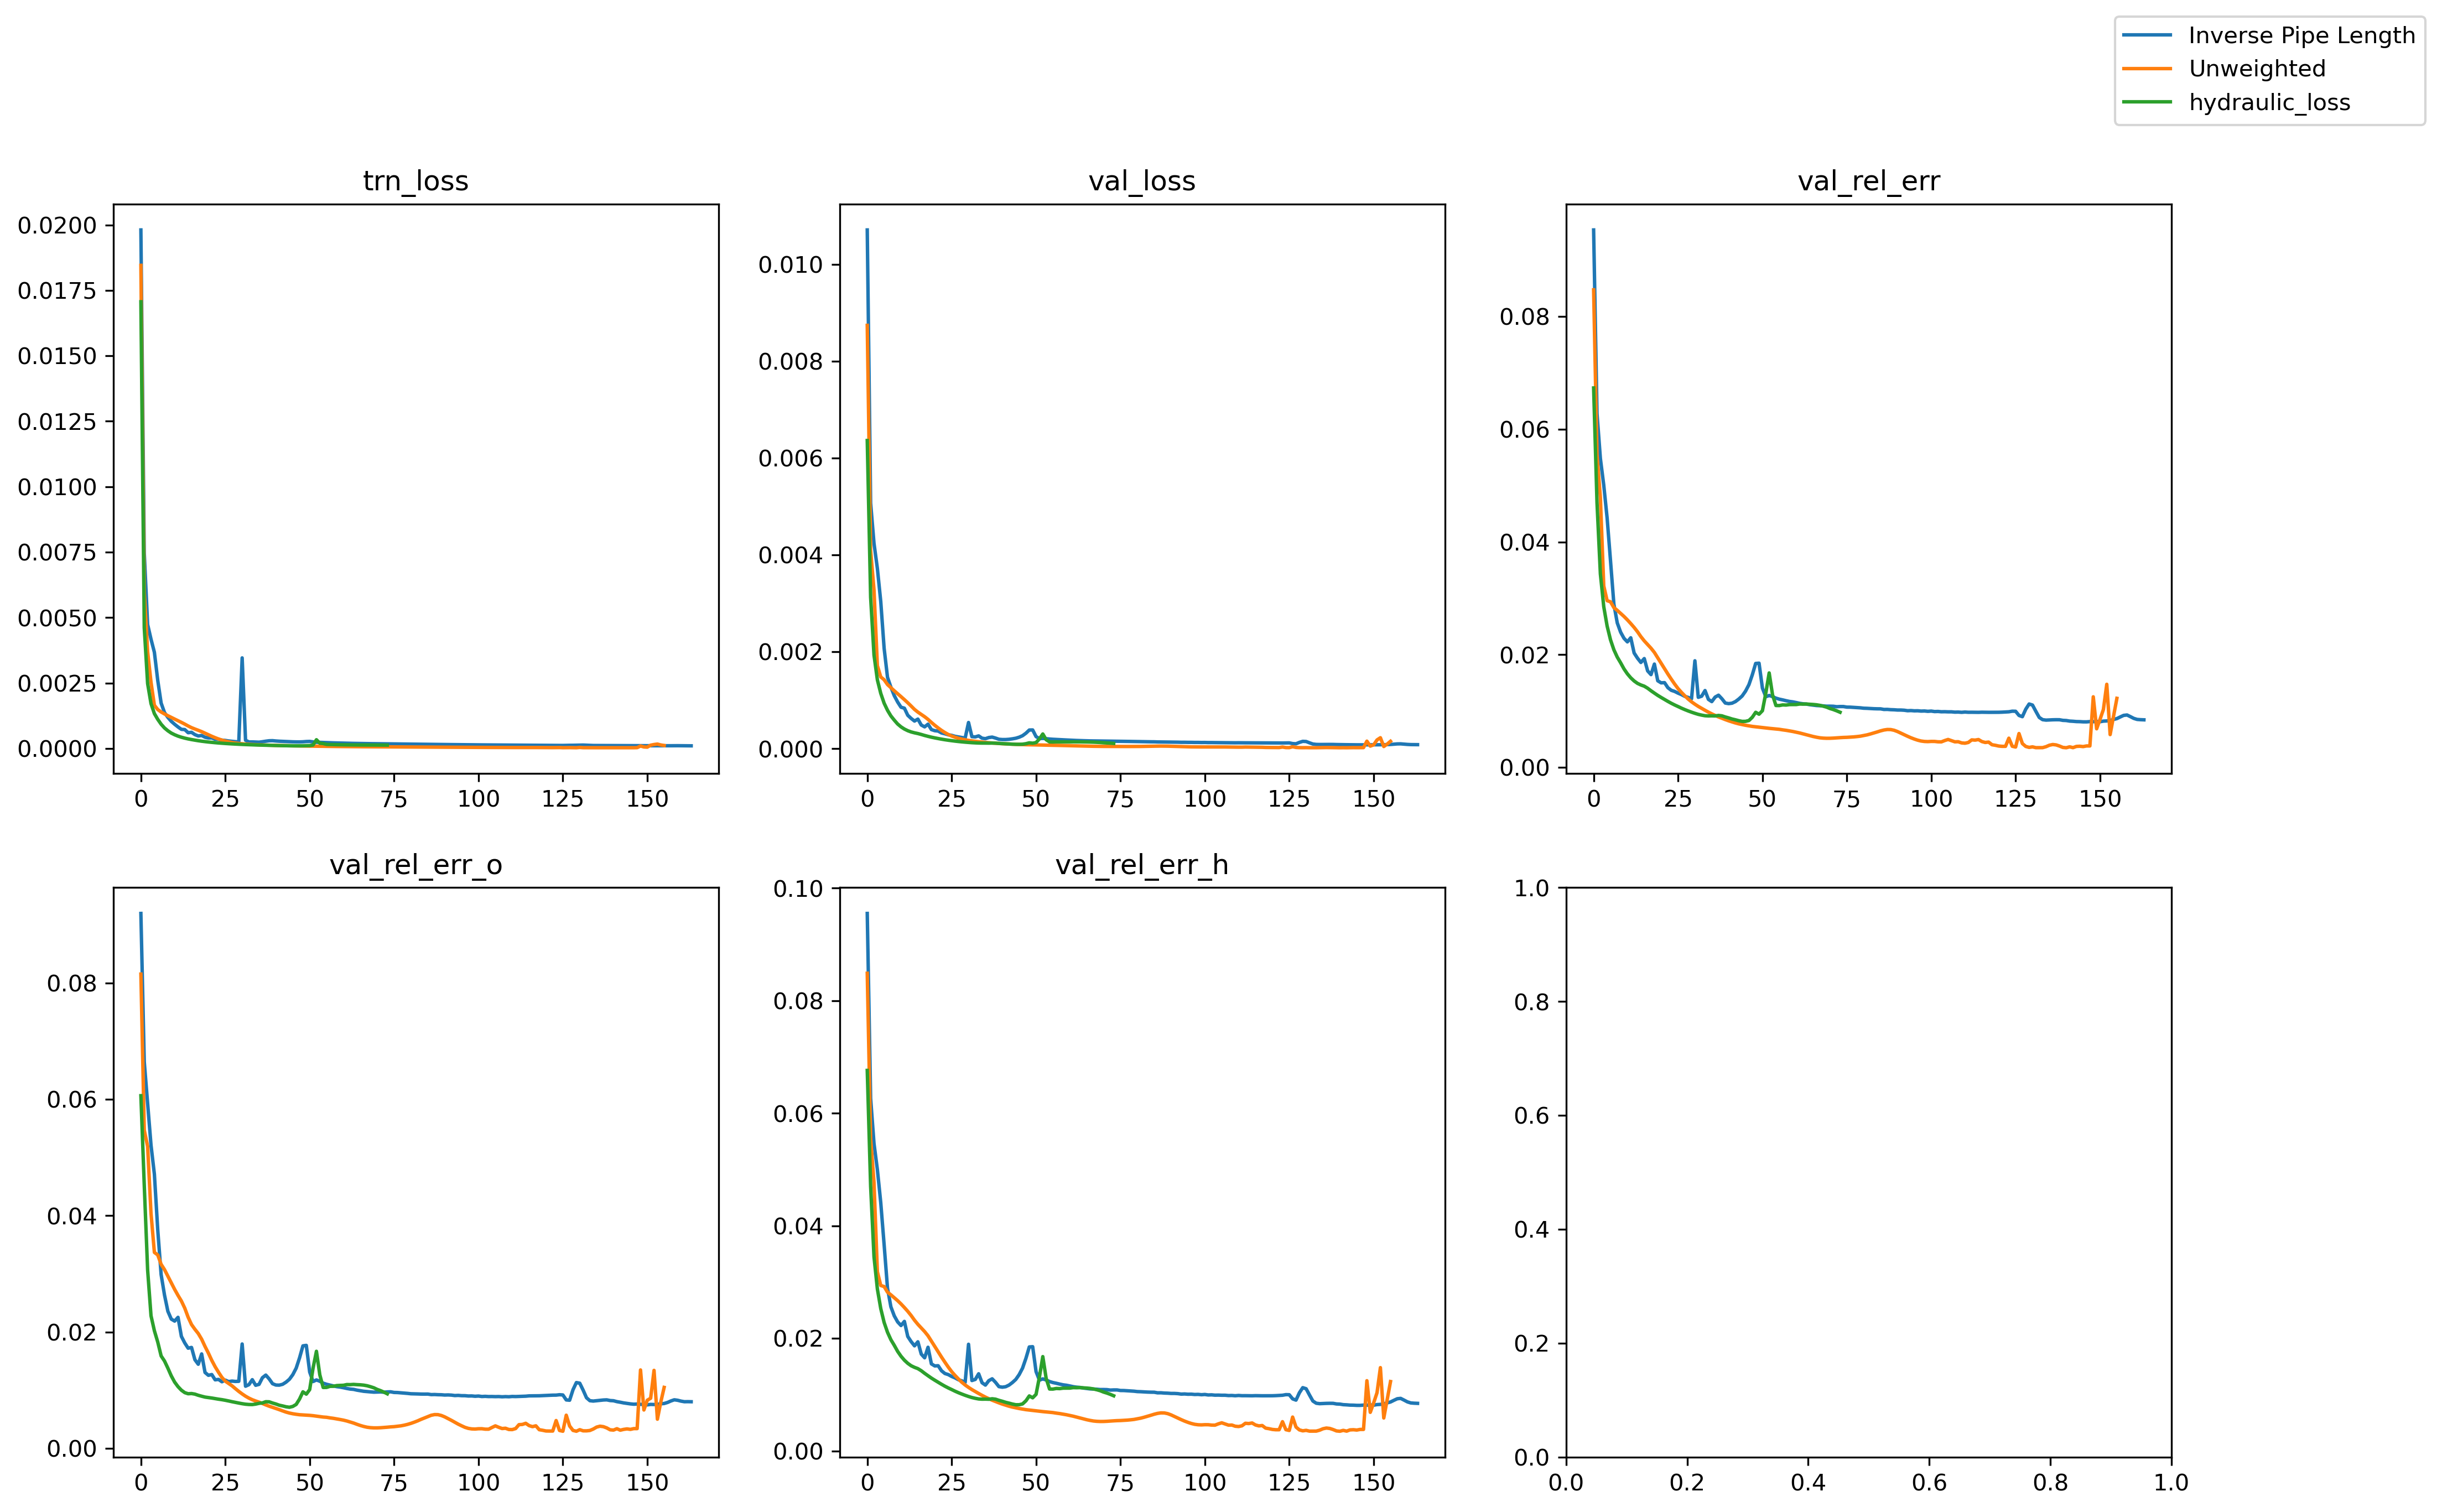

In [35]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10), dpi=300)

firstRun = True

for line,axis in zip(unweighted.columns, ax.ravel()):
    axis.plot(inv_pipe_length[line], label='Inverse Pipe Length')
    axis.plot(unweighted[line]     , label='Unweighted')
    axis.plot(hydraulic_loss[line]     , label='hydraulic_loss')
    axis.set_title(line)

handles, labels = axis.get_legend_handles_labels()
by_label        = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()